In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

In [2]:
#load cleaned data without outliers by pickle
df = pd.read_pickle('data/final_data.pkl')

#load cleaned data with outliers by pickle
z_boson = pd.read_pickle('data/z_boson.pkl')

#load cleaned data with outliers by pickle
data_removed1 = pd.read_pickle('data/data_removed1.pickle')
data_removed2 = pd.read_pickle('data/data_removed2.pickle')

In [3]:
z_boson

,pt1,eta1,phi1,pt2,eta2,phi2,class
0,42.9130,-1.3248,-3.0057,42.2897,-0.6624,0.3485,Zmumu
1,39.8744,-0.0057,-0.7744,36.3997,1.3710,2.2952,Zee
2,72.9296,-0.4162,0.9198,39.5410,-0.2680,-1.4629,Zee
3,33.4436,0.3063,-1.6034,27.2395,-1.6182,1.5315,Zee
4,43.9826,0.4276,-0.3876,29.7856,-0.3080,2.8965,Zmumu
...,...,...,...,...,...,...,...
19995,39.1588,0.0434,2.8371,48.0734,-0.8716,-0.7647,Zmumu
19996,38.4240,-1.3922,-1.9531,30.3328,-0.9045,0.8390,Zmumu
19997,35.2640,-2.2673,-0.3794,37.2768,-1.8151,2.9126,Zee
19998,38.9526,-2.2869,1.4960,48.5297,-2.1804,-1.0817,Zee


In [4]:
#function to split dataframe into train and test sets
def split_dataframe(df, class_name, size_test_param=0.2):
    '''
    This function takes a dataframe and a class name and splits the dataframe into train and test sets 
    and returns the train and test sets as x_train, x_test, y_train, y_test

    df: dataframe
    class_name: name of the class column
    size_test_param: size of the test set
    '''

    #convert class column to np array
    class_array = df[class_name].values

    #drop class column from dataframe
    df = df.drop([class_name], axis=1)

    #transform each row of dataframe into a list
    data_list = df.values.tolist()

    x_train, x_test, y_train, y_test = train_test_split(data_list, class_array, test_size=size_test_param)
    
    return x_train, x_test, y_train, y_test

In [6]:
x_train, x_test, y_train, y_test = split_dataframe(z_boson, 'class')

In [7]:
#randomforest classifier

#instantiate randomforest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))

Accuracy score:  0.79125


In [ ]:
#randomforesto classifier using cleaned data without outliers

x_train2, x_test2, y_train2, y_test2 = split_dataframe(z_boson, 'class')

#instantiate randomforest classifier
rf2 = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0)
rf2.fit(x_train2, y_train2)

y_pred2 = rf2.predict(x_test2)

print('Accuracy score: ', accuracy_score(y_test2, y_pred2))

Accuracy score:  0.78275


In [ ]:
P3 = []
for i in range(500):

    x_train3, x_test3, y_train3, y_test3 = split_dataframe(z_boson, 'class')
    rf3 = RandomForestClassifier(n_estimators=50, max_depth=10)
    rf3.fit(x_train3, y_train3)
    y_pred3 = rf3.predict(x_test3)
    P3.append(accuracy_score(y_test3, y_pred3))

p4 = []
for i in range(500):

    x_train4, x_test4, y_train4, y_test4 = split_dataframe(data_removed1, 'class')
    rf4 = RandomForestClassifier(n_estimators=100, max_depth=50)
    rf4.fit(x_train4, y_train4)
    y_pred4 = rf4.predict(x_test4)
    p4.append(accuracy_score(y_test4, y_pred4))


p5 = []
for i in range(500):

    x_train5, x_test5, y_train5, y_test5 = split_dataframe(data_removed2, 'class')
    rf5 = RandomForestClassifier(n_estimators=100, max_depth=50)
    rf5.fit(x_train5, y_train5)
    y_pred5 = rf5.predict(x_test5)
    p5.append(accuracy_score(y_test5, y_pred5))


plt.plot(P3, label='z_boson')
plt.plot(p4, label='data_removed1')
plt.plot(p5, label='data_removed2')


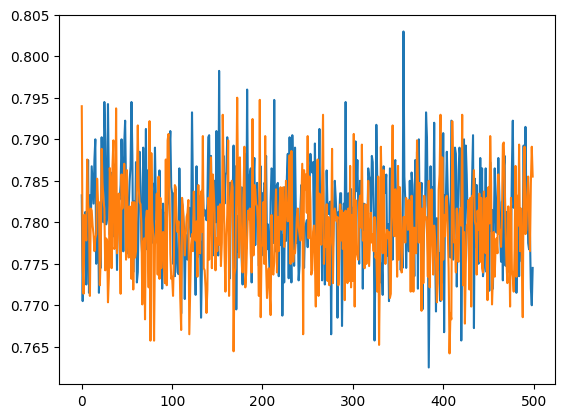

In [ ]:
plt.plot(P3, label='z_boson')
plt.plot(p4, label='data_removed1')

In [ ]:
p5 = []
for i in range(500):

    x_train5, x_test5, y_train5, y_test5 = split_dataframe(data_removed2, 'class')
    rf5 = RandomForestClassifier(n_estimators=100, max_depth=50)
    rf5.fit(x_train5, y_train5)
    y_pred5 = rf5.predict(x_test5)
    p5.append(accuracy_score(y_test5, y_pred5))

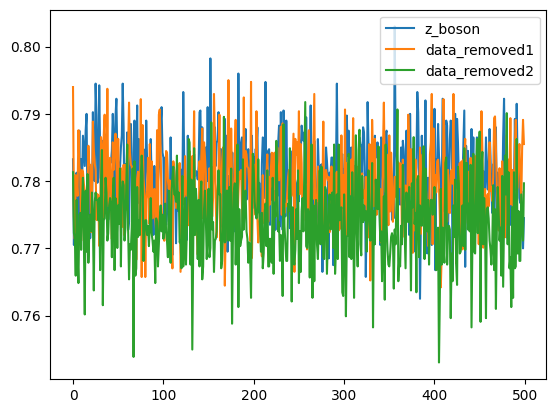

In [ ]:
plt.plot(P3, label='z_boson')
plt.plot(p4, label='data_removed1')
plt.plot(p5, label='data_removed2')
plt.legend()

In [ ]:
print(np.mean(P3))
print(np.mean(p4))
print(np.mean(p5))

0.781134
0.7792756229129206
0.7738406593406594


In [8]:
#Neuronal network using keras to predict the class of the data

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

'''#split data into train and test sets
x_train, x_test, y_train, y_test = split_dataframe(df, 'class')'''

"#split data into train and test sets\nx_train, x_test, y_train, y_test = split_dataframe(df, 'class')"

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [12]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)


SVC()

In [13]:
y_pred = svm_clf.predict(x_test)
print(accuracy_score(y_pred, y_test))

0.6075


In [10]:
class ml_trainer():

    '''
    This class contains different methods to pre-train a machine learning model over a given dataset.
    The principal idea is find out what model might work better.
    '''

    def __init__(self, dataset, class_name, dataset_type = 'dataframe'):
        '''
        The dataframe is splitted into a train and test lists
        '''

        #Empty list to store the info about the model
        self.model_info = []

        if dataset_type == 'dataframe':
            if class_name == 'None':
                print('error por no entregar el nombre de la clase')

            class_array = dataset[class_name].values
            self.dataset = dataset.drop([class_name], axis=1)
            data_list = self.dataset.values.tolist()
            self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(data_list, class_array, test_size=0.3)

    def train_model(self, model):
        '''
        This method trains a model over the train set
        '''


        params = model.get_params()

        model.fit(self.x_train, self.y_train)
        self.y_pred = model.predict(self.x_test)

        #store the info about the model
        params = model.get_params()
        method = model.__class__.__name__
        acc = accuracy_score(self.y_test, self.y_pred)

        self.model_info.append([method, acc, params])

        #show the confusion matrix
        print(confusion_matrix(self.y_test, self.y_pred))

In [11]:
ml_trainer = ml_trainer(z_boson, 'class')

In [14]:
ml_trainer.train_model(RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0))
ml_trainer.train_model(SVC(kernel='sigmoid'))

[[2254  726    0]
 [ 554 2465    0]
 [   0    1    0]]
[[1559 1421    0]
 [1515 1504    0]
 [   0    1    0]]


In [15]:
for i in ml_trainer.model_info:
    print(i[0])
    print(i[1])

RandomForestClassifier
0.7865
SVC
0.6093333333333333
RandomForestClassifier
0.7865
SVC
0.5105


In [26]:
#train a MLP 
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
ml_trainer.train_model(mlp_model)
